In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import os
from sklearn.metrics import confusion_matrix

In [2]:
# path = './top_10.csv'
path = '../../csv_results/top_10.csv'
df = pd.read_csv(path)
df = df.fillna("None")
ids = [i for i in range(1, 31)]

df_sorted = df.sort_values(by=['Model', 'Augmentasi'], ascending=[True,False])

df_sorted['model_id'] = ids

df_sorted

,Model,Augmentasi,Freeze,Learning Rate,Layer,Optimizer,Result Train,Validation,Test,Test Loss,Time (min),Epoch,model_id
0,Inception,Yes,None,0.0001,1,Adam,0.9982,0.9961,1.0000,0.002035,38,14,1
2,Inception,Yes,None,0.0010,1,Adam,0.9956,1.0000,0.9960,0.007950,74,27,2
3,Inception,Yes,None,0.0010,2,Adam,0.9949,0.9942,0.9960,0.009453,52,19,3
4,Inception,Yes,None,0.0010,1,SGD,0.9990,0.9903,0.9921,0.026240,65,23,4
5,Inception,Yes,None,0.0010,2,SGD,0.9996,0.9961,0.9901,0.031170,79,31,5
1,Inception,No,None,0.0001,1,Adam,0.9991,0.9952,1.0000,0.004126,11,19,6
6,Inception,No,None,0.0010,1,SGD,0.9988,0.9952,0.9901,0.051310,28,50,7
7,Inception,No,None,0.0010,1,Adam,0.9882,0.9952,0.9901,0.047590,9,16,8
8,Inception,No,½,0.0010,2,Adam,0.9962,0.9903,0.9901,0.034430,5,17,9
9,Inception,No,None,0.0001,2,Adam,0.9941,1.0000,0.9901,0.035890,8,14,10


In [3]:
# Assuming your models are in the 'models' directory and have names like 'model6.h5', 'model1.h5', etc.
# models_dir = '../models/top10/'
models_dir = '../../../models/top10/'

# Create an empty dictionary to store the loaded models
loaded_models = {}

for id in ids:
    model_path = os.path.join(models_dir, f'{id}.h5')
    if os.path.exists(model_path):
        loaded_models[id] = tf.keras.models.load_model(model_path)
        print(f'Loaded model {id}')
    else:
        print(f"No model found for id {id}")

Loaded model 1
Loaded model 2
Loaded model 3
Loaded model 4
Loaded model 5
Loaded model 6
Loaded model 7
Loaded model 8
Loaded model 9
Loaded model 10
Loaded model 11
Loaded model 12
Loaded model 13
Loaded model 14
Loaded model 15
Loaded model 16
Loaded model 17
Loaded model 18
Loaded model 19
Loaded model 20
Loaded model 21
Loaded model 22
Loaded model 23
Loaded model 24
Loaded model 25
Loaded model 26
Loaded model 27
Loaded model 28
Loaded model 29
Loaded model 30


# Functions

In [4]:
# data_dir = '../dataset/realworld_test_data/processed/version1/'
data_dir = '../../../dataset/realworld_test_data/processed/merge_clean_v12/'

IMAGE_SIZE = 300
class_names = sorted(os.listdir(data_dir))
n_classes = len(class_names)

print(f"Total number of classes in train: {n_classes}")
print(f"Classes: {class_names}")

Total number of classes in train: 20
Classes: ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']


In [5]:
def load_and_preprocess_image(image, label):
    # Resize the image to the desired size
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    
    # Rescale pixel values to be in the range [0, 1]
    image = tf.image.per_image_standardization(image)
    
#     # Convert image data type to tf.float32
#     image = tf.cast(image, tf.float32)
    
    return image, label

In [6]:
def plot_images(dataset: tf.data.Dataset, n_rows: int = 5, n_cols: int = 4, class_names=class_names, figsize=(20, 20), model=None, check=False, verbose=1):
    """
    Plots a grid of images and their corresponding labels from a tf.data.Dataset object.

    Args:
        dataset (tf.data.Dataset): A TensorFlow dataset object containing the images and labels to plot.
        n_rows (int): Number of rows in the plot grid. Default is 5.
        n_cols (int): Number of columns in the plot grid. Default is 4.
        class_names (list): A list of strings mapping the integer labels to their corresponding class names. Default is None.
        figsize (tuple): A tuple specifying the size of the figure. Default is (20, 20).
        model (tf.keras.Model): A trained TensorFlow model to make predictions on the images. Default is None.
        check (bool): If True and a model is provided, only incorrectly predicted images will be plotted. Default is False.
    """
    
    # Create a figure to display the images
    fig = plt.figure(figsize=figsize)
    
    # Initialize image counter
    image_count = 0
    
    # Loop over all batches in dataset
    for images, labels in dataset:
        
        # Loop over all images in batch
        for i in range(images.shape[0]):
            
            label = int(labels[i].numpy())
            title = "true: "+class_names[label]

            if model:
                pred = model.predict(images[i][np.newaxis], verbose=verbose)

                if check:
                    if label == np.argmax(pred):
                        continue

                pred_label = f"Pred: {np.argmax(pred)}"
                pred_percentage = f" ({np.max(pred) * 100:.2f}%)"
                if class_names:
                    pred_label += f" ({class_names[np.argmax(pred)]})"
                title += f"\n{pred_label} {pred_percentage}"

            # Create a subplot for each image
            ax = fig.add_subplot(n_rows, n_cols, image_count+1)    

            # Plot the image
            ax.imshow(images[i].numpy().astype("uint8"))

            # Set the title to the corresponding label
            ax.set_title(title)

            # Remove the axis ticks
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Increment image counter
            image_count += 1
            
            # Check if maximum number of images has been reached
            if image_count >= n_rows * n_cols:
                break
        
        # Check if maximum number of images has been reached
        if image_count >= n_rows * n_cols:
            break
    
    # Show the plot
    plt.show()

In [7]:
def plot_confusion_m(y_true, y_pred, class_names=None, figsize=(15,15)):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [8]:
# Calculate class distribution
class_dis = [len(os.listdir(data_dir + name)) for name in class_names]
# class_dis = [len(os.listdir(val_dir + name)) for name in class_names]
# class_dis = [len(os.listdir(test_dir + name)) for name in class_names]

# Visualize using interactive pie chart
pie_chart = px.pie(values=class_dis, names=class_names, color=class_names)
pie_chart.update_layout({'title':{'text':"Class Distribution"}})
pie_chart.show()

# Visualize using interactive bar chart
bar_chart = px.bar(y=class_dis, x=class_names, color=class_names)
bar_chart.show()

In [9]:
real_test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir)
real_test_ds_mapped = real_test_ds.map(load_and_preprocess_image)
real_test_ds_mapped.prefetch(tf.data.AUTOTUNE)

Found 857 files belonging to 20 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

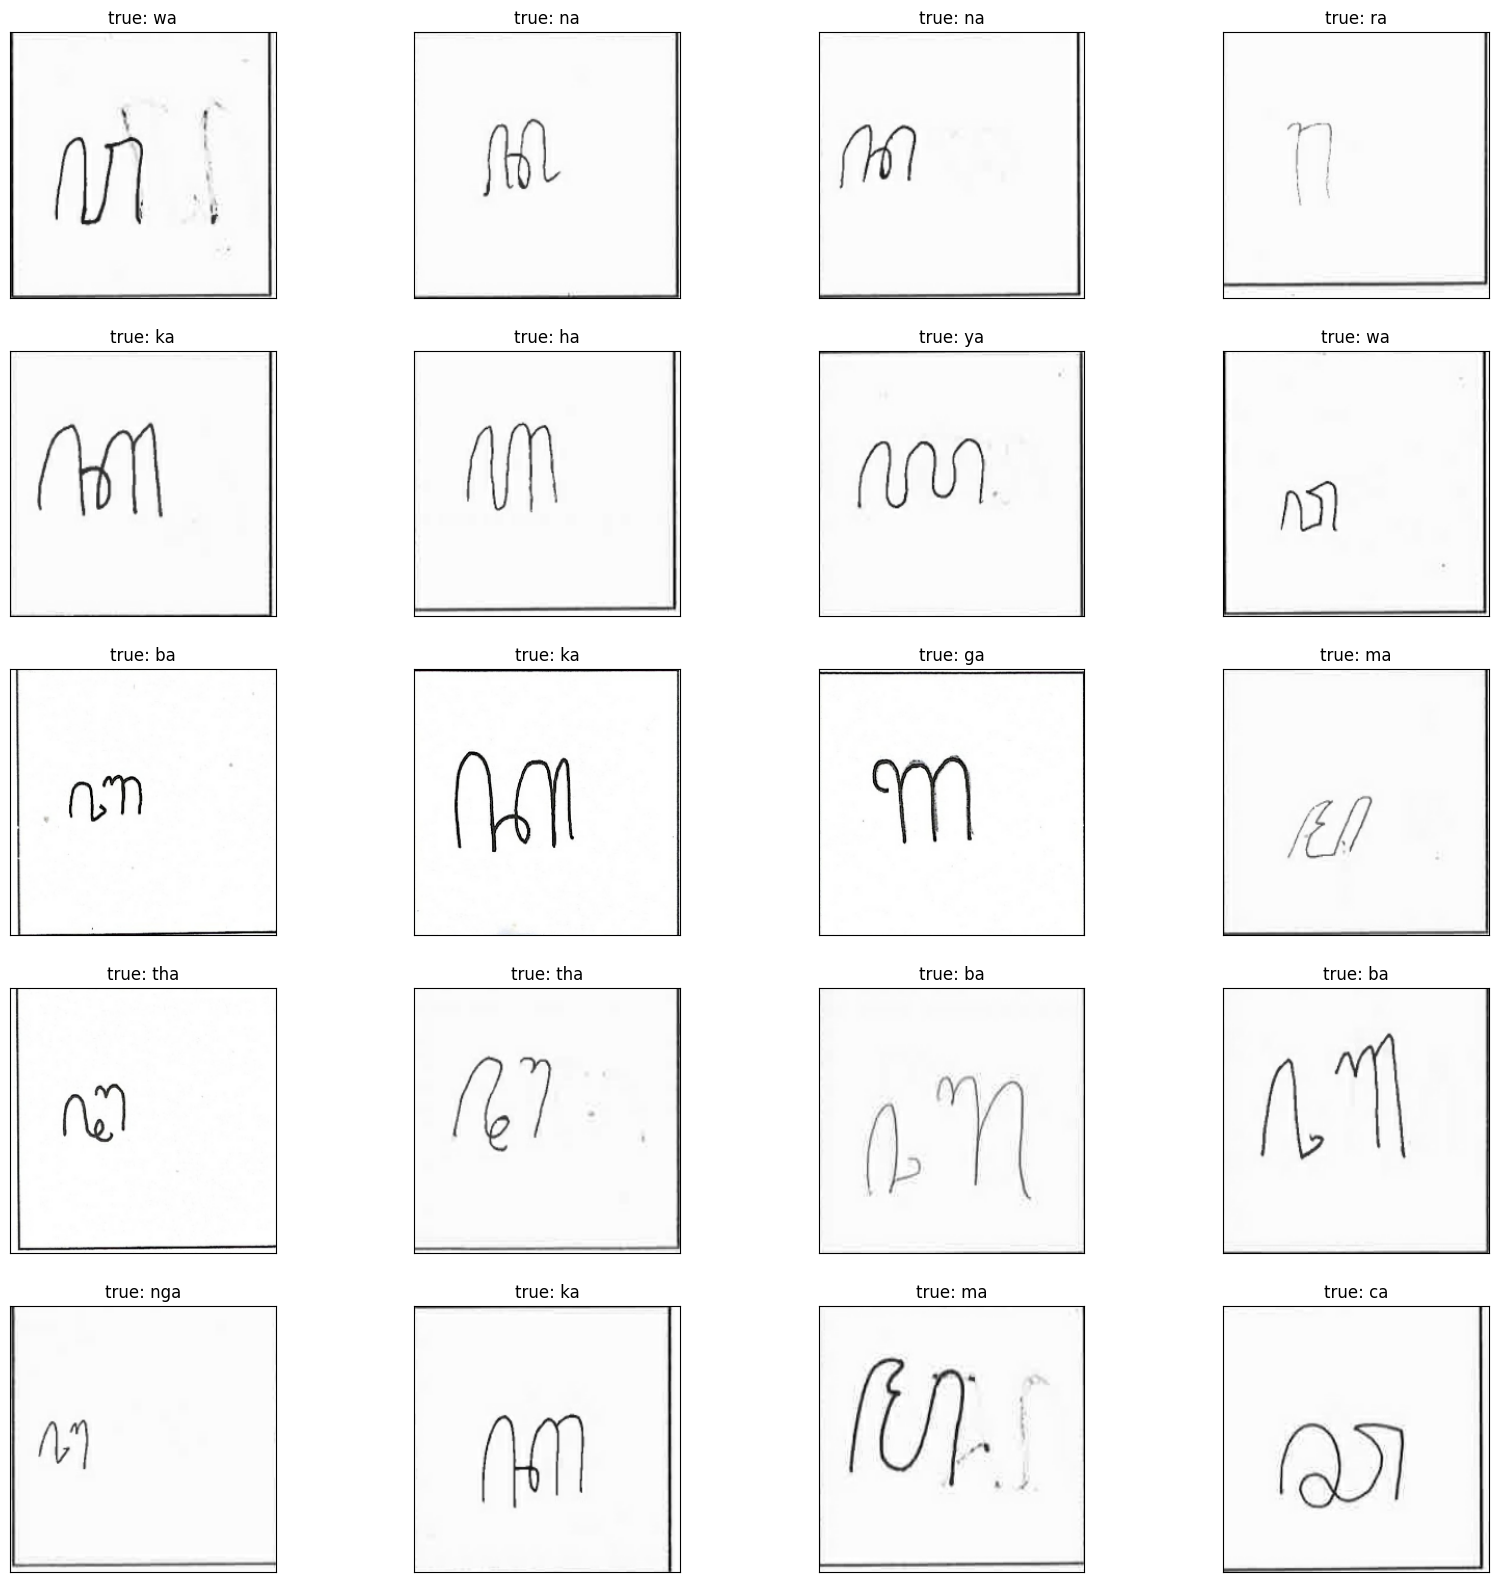

In [10]:
plot_images(real_test_ds)

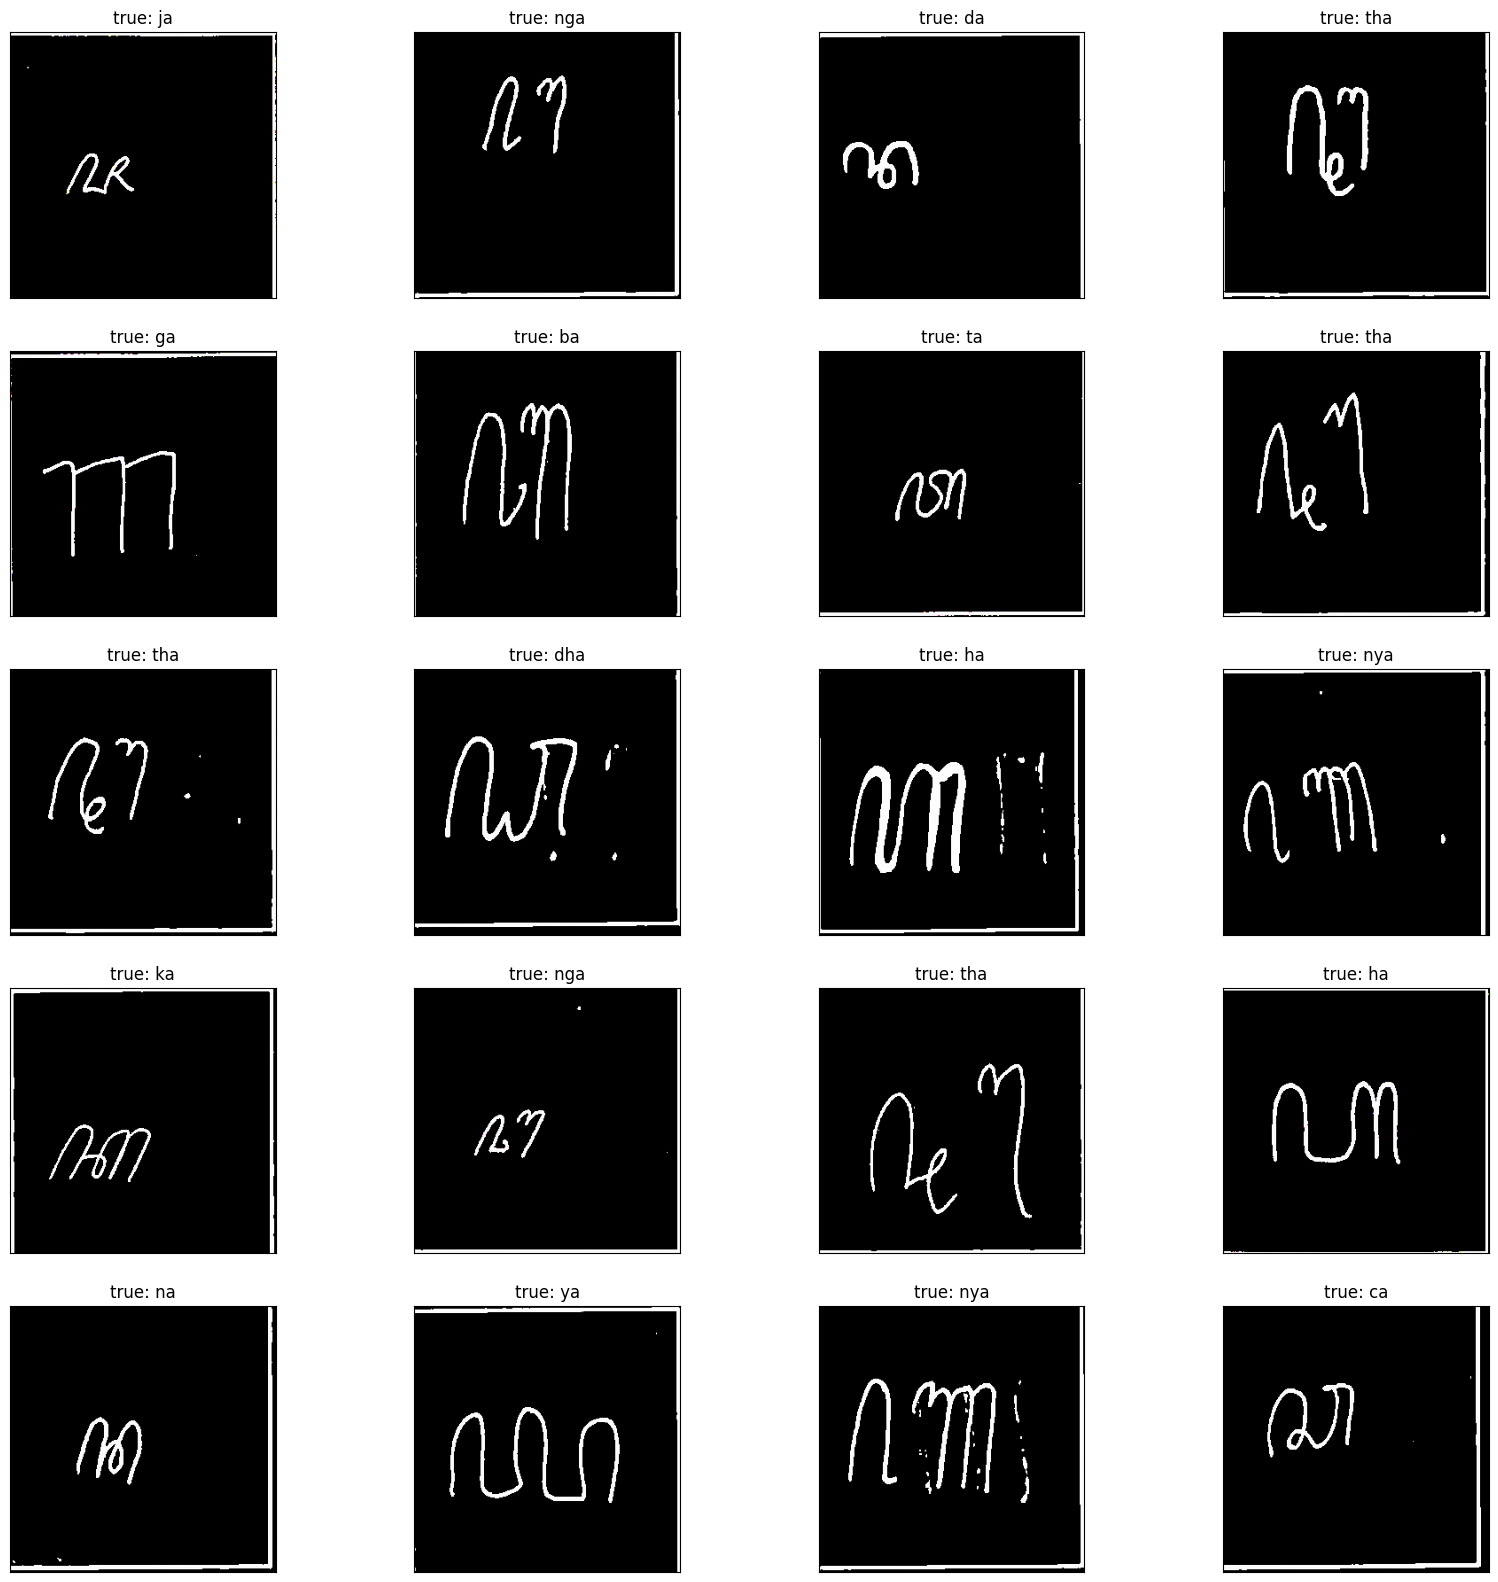

In [11]:
plot_images(real_test_ds_mapped)

In [12]:
results = pd.DataFrame(columns=['model_id', 'loss', 'accuracy'])

for id, model in loaded_models.items():
   
   print(f'START predicting with model {id} ...')
   
   # y_pred = []  # store predicted labels
   # y_true = []  # store true labels

   # # iterate over the dataset
   # for image_batch, label_batch in real_test_ds_mapped:   # use dataset.unbatch() with repeat
   #    # append true labels
   #    y_true.append(label_batch)
   #    # compute predictions
   #    preds = model.predict(image_batch, verbose=0)
   #    # append predicted labels
   #    y_pred.append(np.argmax(preds, axis = - 1))

   # # convert the true and predicted labels into tensors
   # correct_labels = tf.concat([item for item in y_true], axis = 0)
   # predicted_labels = tf.concat([item for item in y_pred], axis = 0)

   # print(f'==== CONFUSION MATRIX FOR MODEL {id} ====')
   # plot_confusion_m(correct_labels, predicted_labels, class_names, figsize=(8,8))
   
   loss, acc = model.evaluate(real_test_ds_mapped)
   print("Loss    : {:.4}".format(loss))
   print("Accuracy: {:.4}%".format(acc*100))
   
   result_df = pd.DataFrame({'model_id': [id], 'loss': [loss], 'accuracy': [acc]})
   results = pd.concat([results, result_df], ignore_index=True)
   
   print(f'FINISHED predicting with model {id} ... \n')

START predicting with model 1 ...
27/27 [==============================] - 58s 2s/step - loss: 0.2915 - accuracy: 0.9148
Loss    : 0.2915
Accuracy: 91.48%
FINISHED predicting with model 1 ... 

START predicting with model 2 ...
27/27 [==============================] - 54s 2s/step - loss: 0.5617 - accuracy: 0.8751
Loss    : 0.5617
Accuracy: 87.51%
FINISHED predicting with model 2 ... 

START predicting with model 3 ...
27/27 [==============================] - 56s 2s/step - loss: 0.6516 - accuracy: 0.8495
Loss    : 0.6516
Accuracy: 84.95%
FINISHED predicting with model 3 ... 

START predicting with model 4 ...
27/27 [==============================] - 57s 2s/step - loss: 1.3019 - accuracy: 0.6114
Loss    : 1.302
Accuracy: 61.14%
FINISHED predicting with model 4 ... 

START predicting with model 5 ...
27/27 [==============================] - 60s 2s/step - loss: 1.2016 - accuracy: 0.6849
Loss    : 1.202
Accuracy: 68.49%
FINISHED predicting with model 5 ... 

START predicting with model 6 ..

# Check Errors

In [13]:
# for id, model in loaded_models.items():
#     print(f'==== MODEL {id} ====')
#     plot_images(real_test_ds_mapped, model=model, check=True, figsize=(20, 20), verbose=0)
#     print(f'==== END MODEL {id} ====\n\n')

# Export Results

In [14]:
results

,model_id,loss,accuracy
0,1,0.291479,0.914819
1,2,0.561660,0.875146
2,3,0.651648,0.849475
3,4,1.301872,0.611435
4,5,1.201620,0.684947
5,6,1.315829,0.631272
6,7,1.985511,0.430572
7,8,0.957672,0.730455
8,9,1.399575,0.605601
9,10,1.635071,0.593932


In [15]:
results_sorted = results.sort_values(by=['accuracy'], ascending=[False])
results_sorted

,model_id,loss,accuracy
0,1,0.291479,0.914819
1,2,0.561660,0.875146
26,27,0.543832,0.851809
2,3,0.651648,0.849475
23,24,0.600610,0.849475
20,21,0.614723,0.844807
11,12,0.519950,0.844807
14,15,0.598405,0.834306
16,17,1.343356,0.810969
22,23,0.803302,0.791132


In [16]:
results.to_csv('./all_top30_models_result.csv', index=False)

# Showcase

Single testing Model 27 ...
==== MODEL 27 ====


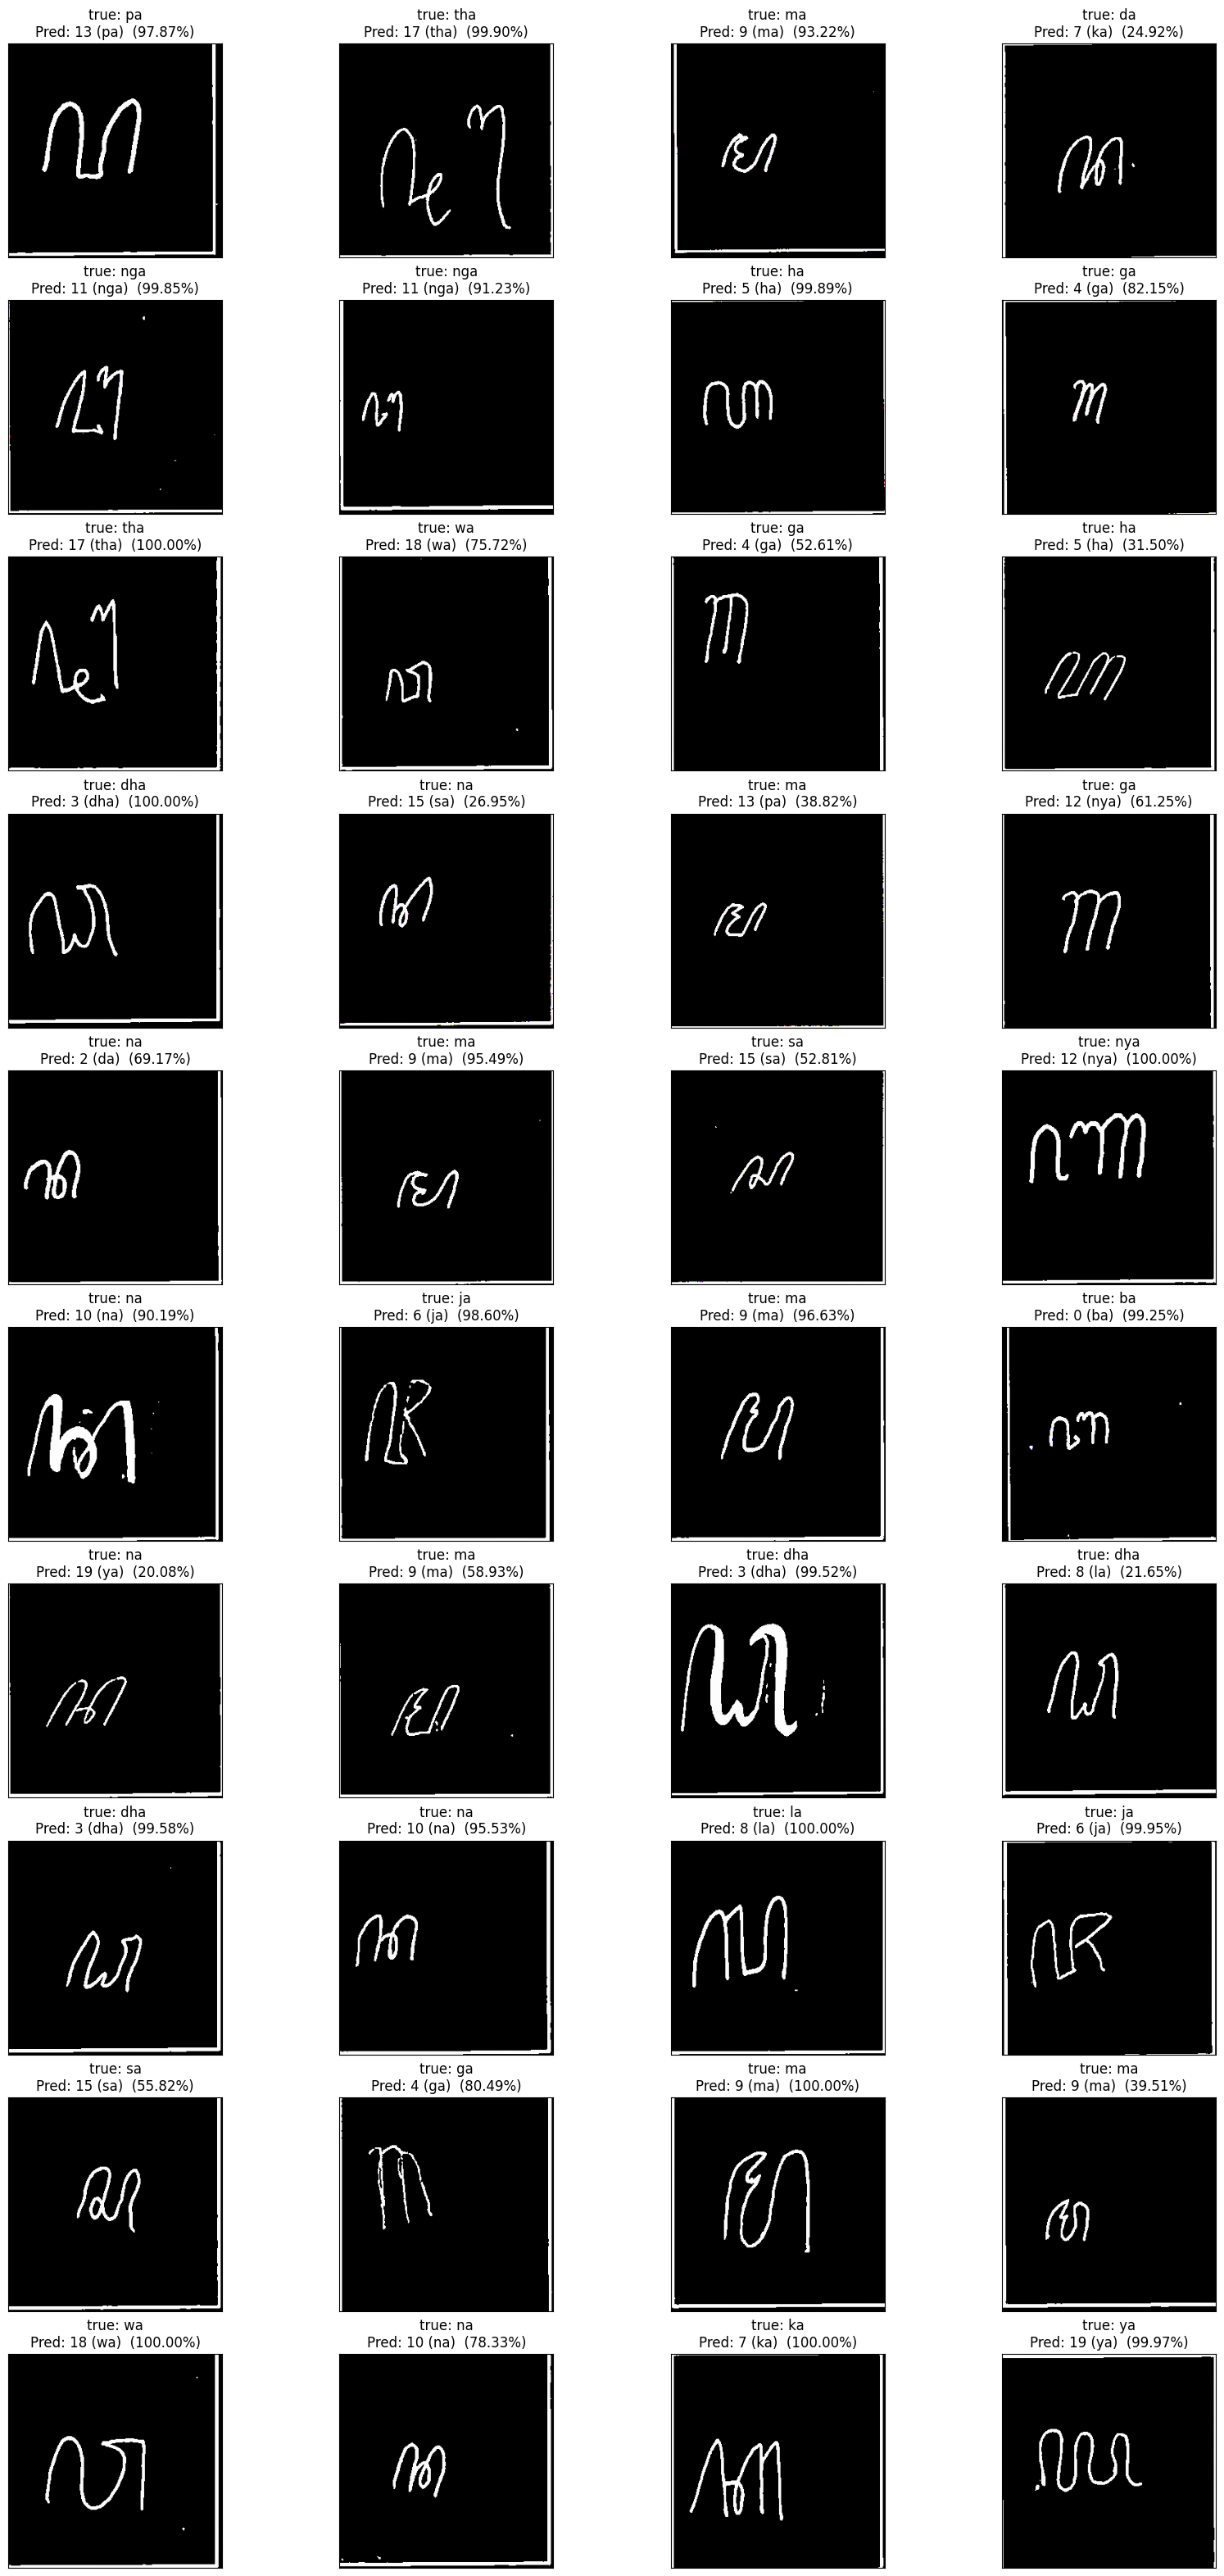

==== END MODEL 27 ====




In [17]:
model_id = 27

print(f'Single testing Model {model_id} ...')
print(f'==== MODEL {model_id} ====')
plot_images(real_test_ds_mapped, n_rows=10, model=loaded_models[model_id], check=False, figsize=(20, 40), verbose=0)
print(f'==== END MODEL {model_id} ====\n\n')